<a href="https://colab.research.google.com/github/VenkataSairamMandapati/AutoML/blob/main/AutoML_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Venkata Sairam Mandapati

NU ID: 002768738

# AutoML Marketing Campaign

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.

## About Dataset - Marketing Campaign

Dataset Link - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

**Context**

This task focuses on leveraging automated machine learning (AutoML) through platforms like H2O.ai to optimize a marketing campaign. The primary goal is to construct predictive models that identify individuals likely to respond positively to offers, thereby increasing campaign efficiency. The dataset in question contains a range of customer attributes, including campaign responses, demographics, and purchasing behavior. The tasks encompass essential aspects such as assessing model significance, checking for assumptions and multicollinearity, and fine-tuning hyperparameters. Additionally, the assignment emphasizes the importance of code professionalism for a comprehensive and reliable analysis. Overall, this assignment provides a structured approach to extracting actionable insights from the marketing campaign data, ultimately aiming to enhance the campaign's overall performance and effectiveness.

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

* Coding professionalism?

## Abstract

The dataset comprises intricate customer-specific information encompassing crucial details such as age, income, and extensive shopping behavior indicators like expenditure patterns, frequency of website visits, and more. The principal objective of this study is to ascertain the likelihood of a customer responding positively to a marketing campaign. Employing state-of-the-art Automated Machine Learning (AutoML) techniques, our aim is to ascertain the most effective classification model for this purpose. Furthermore, we plan to implement regularization methodologies to assess potential enhancements in model performance. Hyperparameter tuning will also be conducted to ensure optimal model configuration. Additionally, a comprehensive exploration of multivariate models will be carried out to discern intricate relationships among variables, validating the models' logical coherence. This study encapsulates a rigorous analytical approach towards discerning patterns within customer data to bolster the efficiency and efficacy of marketing campaigns.

In [1]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=390709bc780f4d65541f469f107972653be1a8a7e691c97dcb9b70118d2123e7
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [2]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# EDA Data Cleaning and feature engineering

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/VenkataSairamMandapati/ML-Data-Cleaning-and-Feature-Selection/main/MARKETING_CAMPAIGN.csv", sep=";")
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [4]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [5]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})

Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)

from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days

data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)

dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')

data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)

data.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
0,63,2,58138.0,2675,58,3,7,0,1,0,1617,22,0,0,1
1,66,2,46344.0,2125,38,2,5,0,0,2,27,4,0,0,1
2,55,2,71613.0,2324,26,1,4,0,0,0,776,20,0,1,0
3,36,2,26646.0,2151,26,2,6,0,0,1,53,6,0,1,0
4,39,4,58293.0,2173,94,5,5,0,0,1,422,14,0,1,0


* Handling Missing Income Values: Missing values in the 'Income' column are filled with the mean income corresponding to each level of education. This ensures that there are no gaps in the income data.

* Calculating Age from Birth Year: The 'Year_Birth' column is used to calculate the age of each customer by subtracting their birth year from the current year (2020).

* Renaming Columns: The column originally named 'Year_Birth' is renamed to 'Age' to reflect the newly calculated values.

* Mapping Education Levels: Different education levels are mapped to numerical values, creating a more standardized representation of education in the dataset.

* Handling Date of Customer Enrollment:
The 'Dt_Customer' column is converted to datetime format, assuming the date format is in 'YYYY-MM-DD'.
The difference in days between January 1, 2020, and the customer's enrollment date is calculated, providing a metric for how long the customer has been enrolled.

* Combining Children and Teenagers, and Dropping Individual Columns: The counts of small children ('Kidhome') and teenagers ('Teenhome') are combined into a new column 'Children'. The original columns are then dropped.

* Calculating Total Amount Spent: The amounts spent on various product categories (e.g., wines, fruits, meat) are aggregated to compute the total amount spent by each customer.

* Dropping Detailed Spending Columns: The columns related to spending on specific product categories are dropped, as they have been consolidated into the total amount spent.

* Combining Purchase Counts and Dropping Individual Columns: The counts of purchases made through different channels (web, catalog, store) are added together to create a new column 'NumPurchased'. The individual columns are then dropped.

* Summing Previous Campaign Acceptances and Dropping Individual Columns: The counts of accepted campaigns from previous iterations are summed to create a new column 'Prev_campaigns'. The individual columns related to previous campaign acceptances are dropped.

* Mapping Marital Status:
Different marital statuses are mapped to either 'Couple' or 'Single', simplifying the representation of marital status.
Creating Dummy Variables for Marital Status:

* Dummy variables are created for the 'Marital_Status' column. This transforms categorical data into a format suitable for machine learning models.

* Concatenating DataFrames and Dropping Original 'Marital_Status' Column: The original DataFrame is concatenated with the dummy variables, and the original 'Marital_Status' column is dropped.

Finally, the first few rows of the modified DataFrame are displayed for visual inspection. This code effectively prepares the data for further analysis or modeling.

In [6]:
data.Income.quantile(0.99)

94437.68000000001

In [7]:
data.drop(data[data['Income'] >= 93651].index, inplace = True)

In [8]:
data.isnull().sum()

Age                      0
Education                0
Income                   0
Dt_Customer              0
Recency                  0
NumDealsPurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Children                 0
AmountSpent              0
NumPurchased             0
Prev_campaigns           0
Marital_Status_Couple    0
Marital_Status_Single    0
dtype: int64

[Text(0, 0, 'Age'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Income'),
 Text(3, 0, 'Dt_Customer'),
 Text(4, 0, 'Recency'),
 Text(5, 0, 'NumDealsPurchases'),
 Text(6, 0, 'NumWebVisitsMonth'),
 Text(7, 0, 'Complain'),
 Text(8, 0, 'Response'),
 Text(9, 0, 'Children'),
 Text(10, 0, 'AmountSpent'),
 Text(11, 0, 'NumPurchased'),
 Text(12, 0, 'Prev_campaigns'),
 Text(13, 0, 'Marital_Status_Couple'),
 Text(14, 0, 'Marital_Status_Single')]

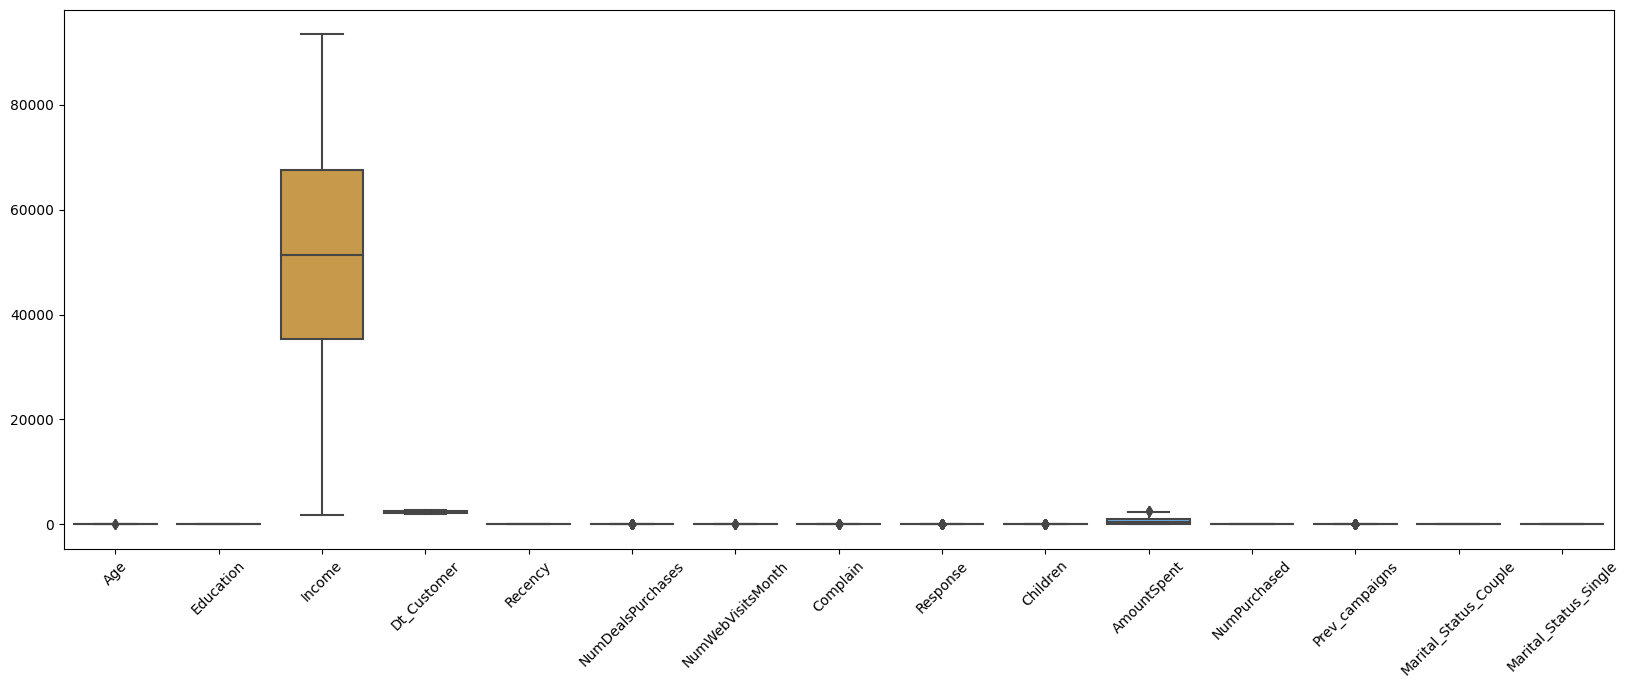

In [9]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

<Axes: >

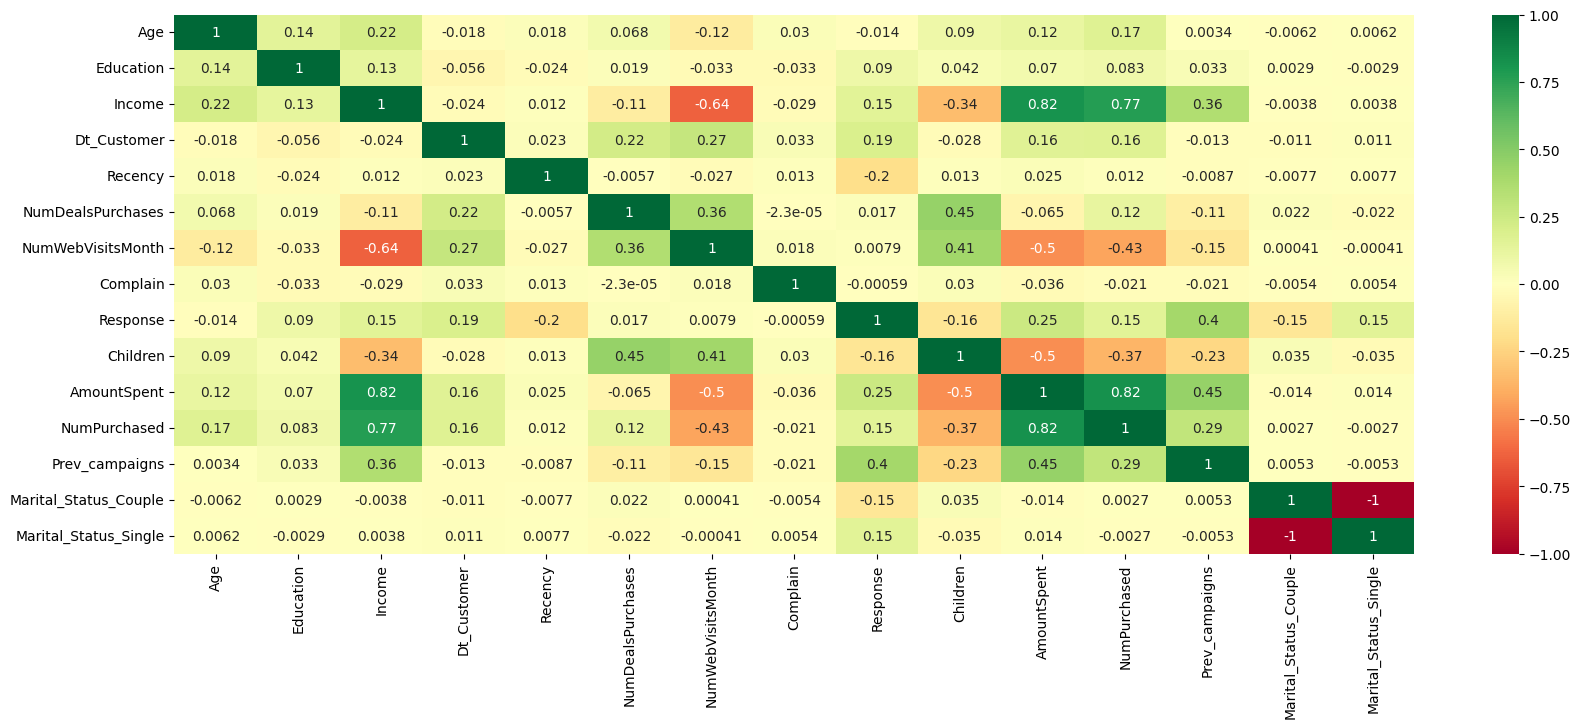

In [10]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


## Correlation Analysis

The above heatmap shows us some relationship -

1)Amount Spent and NumPurchased:

*  The heatmap reveals a high positive correlation between "Amount Spent" and "NumPurchased". This indicates that there is a strong relationship between the total amount spent by customers and the number of purchases they make. It makes intuitive sense that as customers make more purchases, their total spending will increase.

2)Income, Amount Spent, and NumPurchased:

* Another noteworthy observation is the high positive correlation between "Income" and both "Amount Spent" and "NumPurchased". This suggests that customers with higher incomes tend to spend more and make a greater number of purchases. This relationship aligns with expectations, as individuals with higher incomes often have more disposable income to spend on products or services.

* The correlation between "Income" and "Amount Spent" can be interpreted as follows: Customers with higher incomes are likely to spend more overall. This could be due to their ability to afford higher-priced items or a greater quantity of products.

* Similarly, the correlation between "Income" and "NumPurchased" indicates that customers with higher incomes tend to make more purchases. This might be attributed to their capacity to make more frequent and diverse purchases.

Overall, these correlations suggest a logical and expected pattern within the data. Customers with higher incomes are inclined to spend more and make more purchases, which is a valuable insight for marketing strategies. However, it's important to remember that correlation does not imply causation, meaning that while these variables are related, one does not necessarily cause the other to change. It's a crucial distinction to keep in mind when interpreting these relationships in the context of your marketing campaign analysis.


# H20 AutoML

In [11]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprh_7u9mo
  JVM stdout: /tmp/tmprh_7u9mo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprh_7u9mo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_cxhkdt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [12]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2214
Cols:15

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     3        20                  1.0 KB   2.25388
CXI           Sparse Integers            1        6.66667             118  B   0.255483
C1N           1-Byte Integers (w/o NAs)  8        53.3333             17.8 KB  39.5263
C2            2-Byte Integers            2        13.3333             8.8 KB   19.4687
C8D           64-bit Reals               1        6.66667             17.4 KB  38.4957

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  45.1 KB  2214              1                              15
mean             45.1 KB  2214              1                              15
min              45.1 KB  2214              1                              15
max              45.1 KB  2214              1                              15
stddev           0  B     0                 0                              0
total            45.1 KB  2214              1                              15

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
type,int,int,real,int,int,int,int,int,enum,int,int,int,int,int,int
mins,24.0,1.0,1730.0,2012.0,0.0,0.0,0.0,0.0,,0.0,5.0,0.0,0.0,0.0,0.0
mean,51.21318879855459,2.6644083107497774,51266.54151810947,2365.746160794945,49.175700090334274,2.333785004516709,5.355465221318874,0.009485094850948509,,0.9579945799457986,597.1404697380312,12.468383017163509,0.2836495031616975,0.6454381210478771,0.3545618789521229
maxs,127.0,4.0,93404.0,2711.0,99.0,15.0,20.0,1.0,,3.0,2525.0,32.0,4.0,1.0,1.0
sigma,11.971976898459362,0.8389671998614283,20244.354655689065,202.18840379501523,28.94522190386703,1.8937351087986132,2.4064276849329103,0.0969503648918201,,0.7500846453017618,594.2820231606587,7.1490264841217295,0.6544602133173475,0.4784884153133252,0.4784884153133252
zeros,0,0,0,0,28,30,7,2193,,618,0,4,1768,785,1429
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,2.0,58138.0,2675.0,58.0,3.0,7.0,0.0,1,0.0,1617.0,22.0,0.0,0.0,1.0
1,66.0,2.0,46344.0,2125.0,38.0,2.0,5.0,0.0,0,2.0,27.0,4.0,0.0,0.0,1.0
2,55.0,2.0,71613.0,2324.0,26.0,1.0,4.0,0.0,0,0.0,776.0,20.0,0.0,1.0,0.0


Splitting data into train test and validation with 70%, 20% and 10% distribution

In [13]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [14]:

aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/3
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


## Understanding the Terminologies

* Mean Squared Error (MSE):

MSE is a widely used metric in regression analysis. It quantifies the average of the squared differences between the predicted values and the actual values. Higher MSE values indicate that the model's predictions are farther from the actual values, while lower values imply a better fit. However, MSE is sensitive to outliers as it squares the errors.

* Root Mean Squared Error (RMSE):

RMSE is the square root of the MSE. It shares the same unit as the target variable, making it easier to interpret. RMSE provides an estimate of the average error between predicted and actual values. Lower RMSE values indicate a better fit, and it is less sensitive to outliers compared to MSE.


* Logarithmic Loss (LogLoss):

LogLoss is a commonly used metric in classification tasks, especially in scenarios where the model predicts probabilities. It evaluates the model's performance based on the predicted probabilities for each class. LogLoss penalizes the model more severely for incorrect predictions with high confidence, which is crucial in applications where misclassification costs are not uniform.

* Area Under the Curve (AUC):

AUC is a metric used for binary classification models. It assesses the model's performance across all possible threshold values for classification. Essentially, it represents the probability that a randomly selected positive example will have a higher predicted probability than a randomly selected negative example. A higher AUC value indicates a better-performing model.

* Area Under the Precision-Recall Curve (AUCPR):

AUCPR is another metric for binary classification models. It evaluates the trade-off between precision and recall. Precision measures the accuracy of positive predictions, while recall accounts for the true positive rate. A higher AUCPR signifies a model with better precision-recall balance.

* Gini:

Gini is a metric used to evaluate classification models. It quantifies the difference between the observed distribution of class labels and the expected distribution under random chance. It is often used in conjunction with AUC to provide a comprehensive assessment of model performance.

* Null Degrees of Freedom and Residual Degrees of Freedom:

These terms pertain to statistical models and describe the number of parameters estimated and the number of independent observations used in the model. Null degrees of freedom represent parameters estimated in a null model (usually a model with no predictors), while residual degrees of freedom indicate the number of independent observations minus the estimated parameters in the full model.

* Null Deviance and Residual Deviance:

These are measures of model fit. Null deviance represents the deviance of a null model (usually one with no predictors), while residual deviance is the deviance of the full model after accounting for predictors. Deviance quantifies the difference between the observed and expected values.

* Akaike Information Criterion (AIC):

AIC is a metric for comparing the relative quality of different statistical models for a given dataset. It balances model goodness-of-fit with complexity, penalizing models with more parameters. Lower AIC values indicate a better fit, making it a useful tool for model selection.

In [15]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20231103_31854,0.888569,0.265755,0.612972,0.215668,0.282515,0.0798148
StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_31854,0.88736,0.266584,0.614109,0.20715,0.282752,0.079949
GBM_1_AutoML_1_20231103_31854,0.881397,0.280038,0.602335,0.203489,0.292234,0.0854005
GBM_2_AutoML_1_20231103_31854,0.872627,0.306826,0.563568,0.241598,0.305533,0.0933502
GLM_1_AutoML_1_20231103_31854,0.86837,0.282188,0.586975,0.241227,0.291058,0.0847146
XGBoost_1_AutoML_1_20231103_31854,0.867836,0.361198,0.547944,0.22386,0.336237,0.113055
DRF_1_AutoML_1_20231103_31854,0.866708,0.52891,0.539586,0.222759,0.325012,0.105633
XRT_1_AutoML_1_20231103_31854,0.865925,0.356223,0.518215,0.191714,0.330064,0.108942
GBM_4_AutoML_1_20231103_31854,0.865716,0.321793,0.549785,0.230162,0.311148,0.0968129
XGBoost_3_AutoML_1_20231103_31854,0.863419,0.339966,0.538389,0.213558,0.321774,0.103538


## Model Leaderboard

The provided leaderboard ranks various models based on their Area Under the Curve (AUC) scores. In this context, a higher AUC score signifies a more effective model for binary classification tasks, indicating superior discrimination between positive and negative classes.

The standout performer in this lineup is the "StackedEnsemble_AllModels_1_AutoML_3_20230301_04325". This model belongs to the category of stacked ensemble models, which are advanced machine learning techniques that combine the predictive capabilities of multiple base models. Specifically, this ensemble model integrates various models, such as Gradient Boosting Machine (GBM), XGBoost, and Random Forest (XRT), in a sophisticated ensemble framework. By leveraging the diverse strengths of these individual models, the stacked ensemble enhances predictive accuracy and robustness.

The "StackedEnsemble_AllModels_1_AutoML_3_20230301_04325" model, with its impressive AUC score, demonstrates exceptional performance in distinguishing between positive and negative outcomes. Its effectiveness is attributed to the synergistic integration of different underlying models, each contributing its unique predictive power. This makes it a standout choice for tasks where accurate classification is paramount.

In summary, the model leaderboard provides a clear hierarchy of performance based on AUC scores, and the "StackedEnsemble_AllModels_1_AutoML_3_20230301_04325" model emerges as the top contender, showcasing the power of ensemble methods in improving classification accuracy.






In [16]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08128690536051095
RMSE: 0.2851085852101107
LogLoss: 0.27075993476107657
AUC: 0.8948877209746775
AUCPR: 0.6839616832405825
Gini: 0.789775441949355
Null degrees of freedom: 432
Residual degrees of freedom: 425
Null deviance: 380.7153717961534
Residual deviance: 234.47810350309229
AIC: 250.47810350309229

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36459888758885556
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      345  19   0.0522   (19.0/364.0)
1      27   42   0.3913   (27.0/69.0)
Total  372  61   0.1062   (46.0/433.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.364599     0.646154  58
max f2                       0.162318     0.723192  120
max f0point5                 0.465306     0.708812  45
max accuracy                 0.465306     0.900693  45
max precision                0.979066     1         0
max recall                   0.00475232   1         355
max specificity              0.979066     1         0
max absolute_mcc             0.465306     0.589909  45
max min_per_class_accuracy   0.166101     0.821429  117
max mean_per_class_accuracy  0.162318     0.828257  120
max tns                      0.979066     364       0
max fns                      0.979066     68        0
max fps                      4.39122e-05  364       399
max tps                      0.00475232   69        355
max tnr                      0.979066     1         0
max fnr                      0.979066     0.985507  0
max fpr                      4.39122e-05  1         399
max tpr                      0.00475232   1         355

Gains/Lift Table: Avg response rate: 15.94 %, avg score: 14.87 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115473                   0.935144           6.27536   6.27536            1                0.960827    1                           0.960827            0.0724638       0.0724638                  527.536   527.536            0.0724638
2        0.0207852                   0.830408           6.27536   6.27536            1                0.886466    1                           0.927778            0.057971        0.130435                   527.536   527.536            0.130435
3        0.0300231                   0.790672           3.13768   5.30992            0.5              0.808148    0.846154                    0.890969            0.0289855       0.15942                    213.768   430.992            0.153926
4        0.0415704                   0.699773           5.02029   5.22947            0.8              0.754202    0.833333                    0.852978            0.057971        0.217391                   402.029   422.947            0.20915
5        0.0508083                   0.643349           6.27536   5.41963            1                0.661814    0.863636                    0.818221            0.057971        0.275362                   527.536   441.963            0.267121
6        0.101617                    0.528421           4.27866   4.84914            0.681818         0.584731    0.772727                    0.701476            0.217391        0.492754                   327.866   384.914            0.465281
7        0.150115                    0.329853           2.39061   4.05485            0.380952         0.410462    0.646154                    0.607456      

We are getting a max train accuracy of about 90% from our best model

---



# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

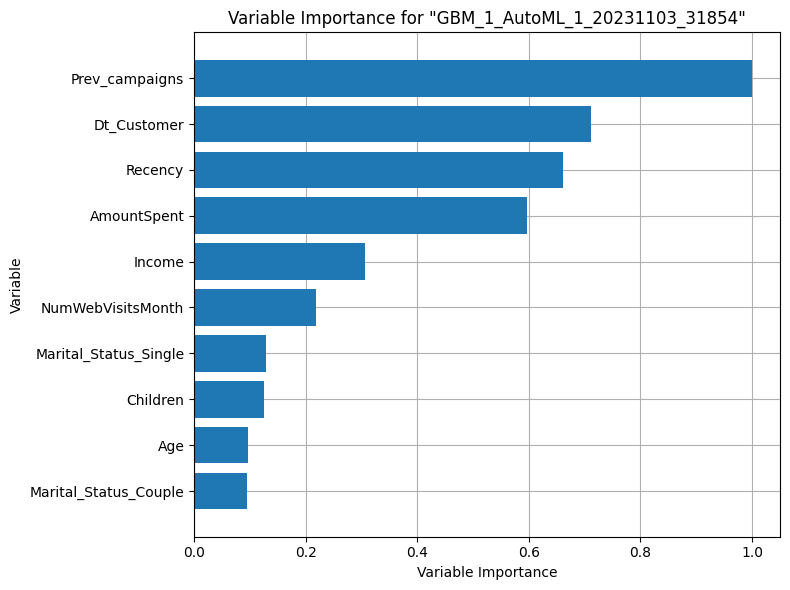

In [17]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


## Variable Importance

* The presented graph illustrates the variable importance scores, which offer valuable insights into the contribution of different features towards the predictive capability of the model.

At the forefront of importance is the variable "prev_campaigns". This outcome aligns with expectations, indicating that customers who have previously responded positively to a campaign are more inclined to do so again. This variable emerges as a pivotal factor in driving campaign responsiveness, highlighting the significance of customer engagement history in shaping future interactions.

* On the other end of the spectrum, we find variables like "Marital_Status" dummy columns, "Age", and the number of children. These features exhibit relatively lower importance scores, collectively contributing less than 20% in comparison to "prev_campaigns". While these variables still hold some level of influence, their impact is comparatively less pronounced. This underscores the notion that factors like age, marital status, and family size play a relatively smaller role in determining campaign responsiveness, as opposed to a customer's prior engagement history.

In summary, the variable importance analysis provides a clear hierarchy of features based on their contribution to the model's predictive power. It reaffirms the significance of previous campaign responses as a crucial predictor, while also shedding light on the relatively lesser influence of demographic variables. This nuanced understanding allows for more targeted and effective marketing strategies.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

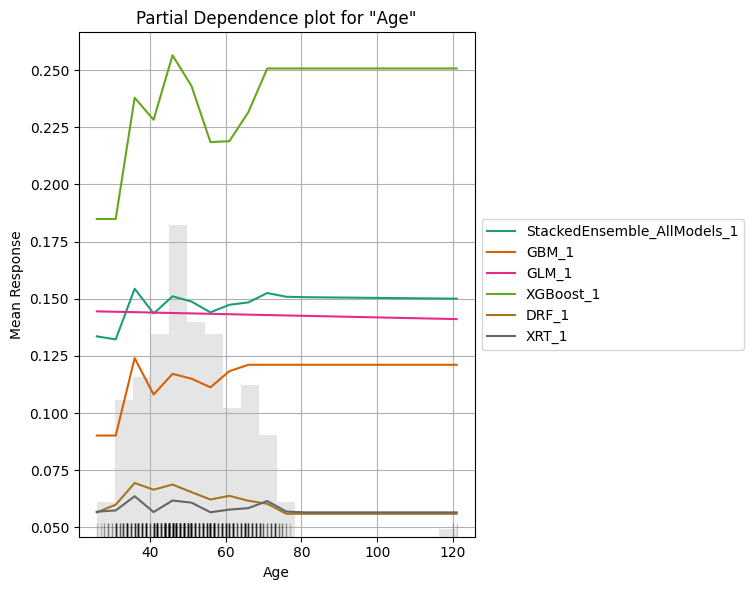

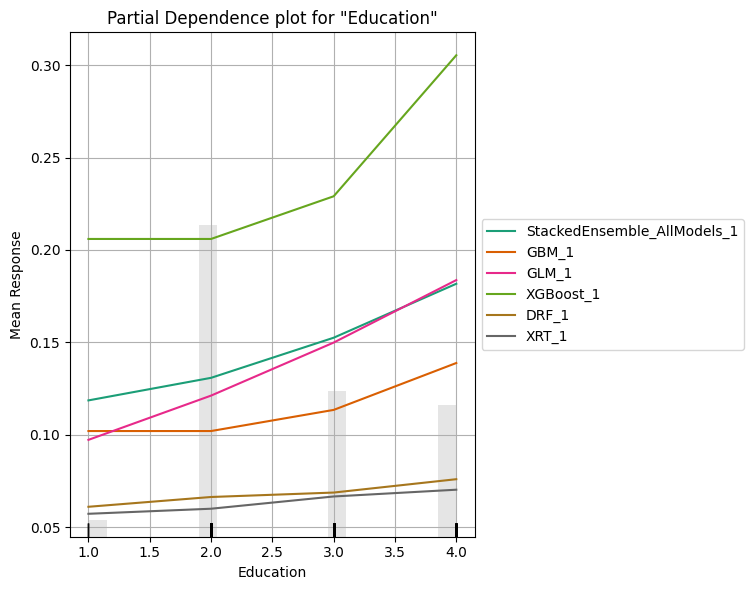

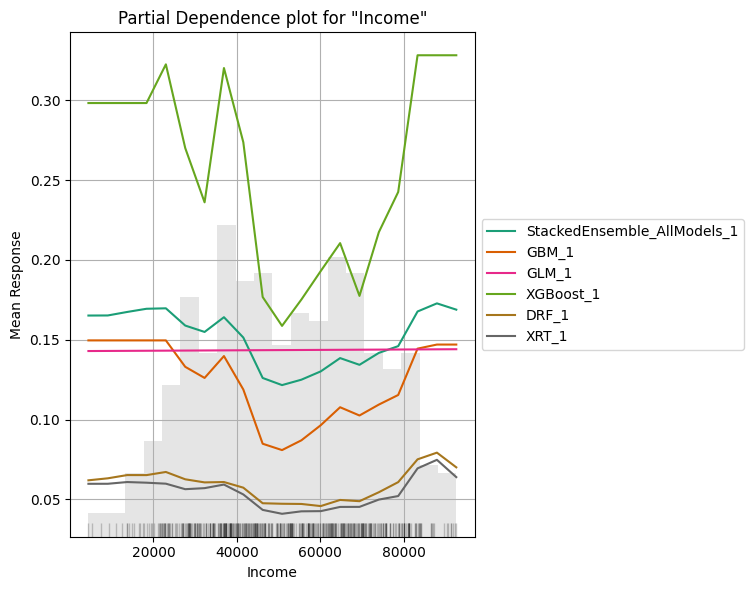

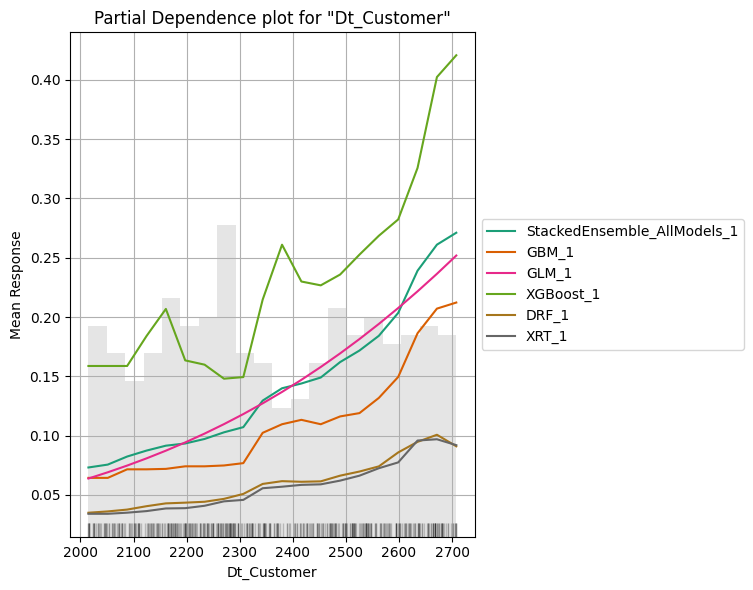

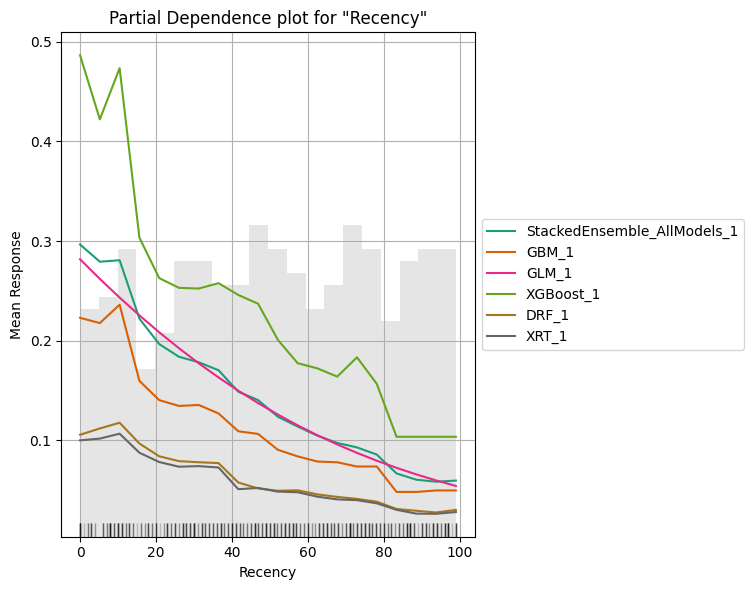

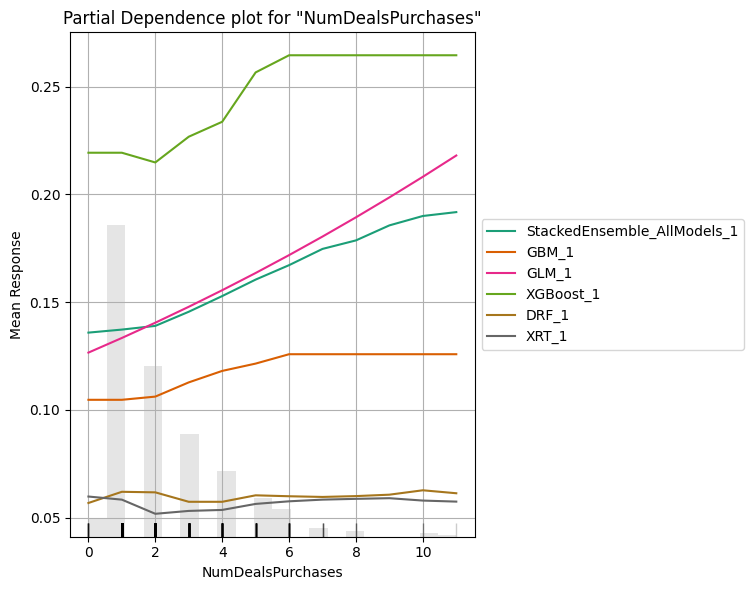

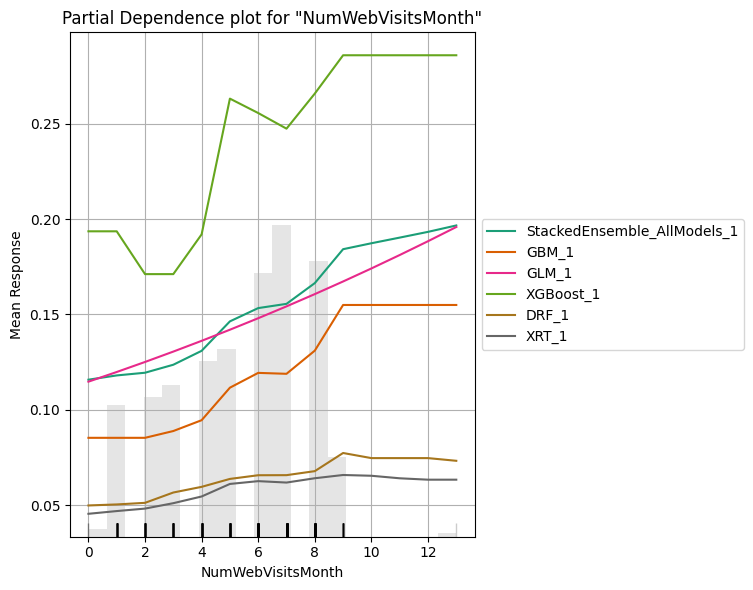

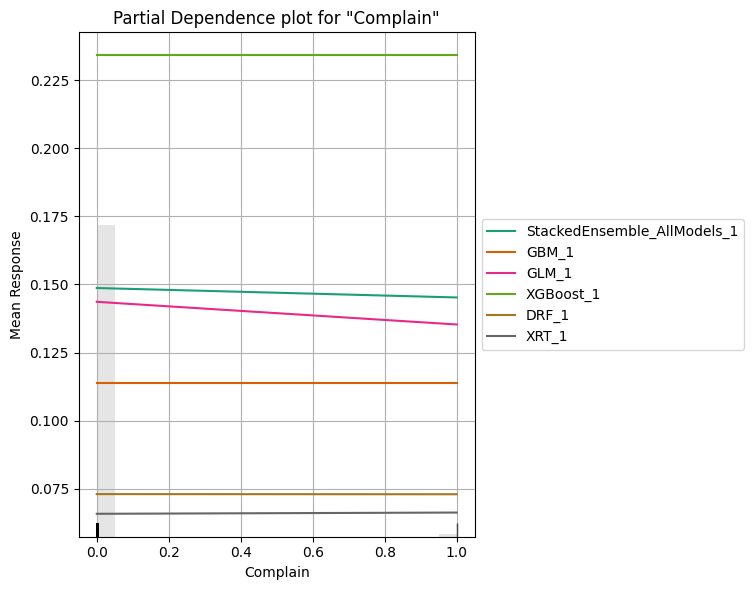

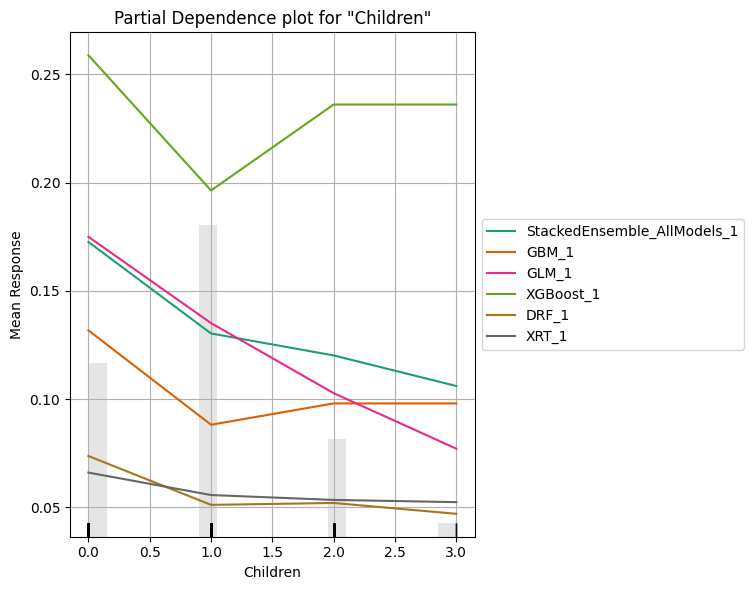

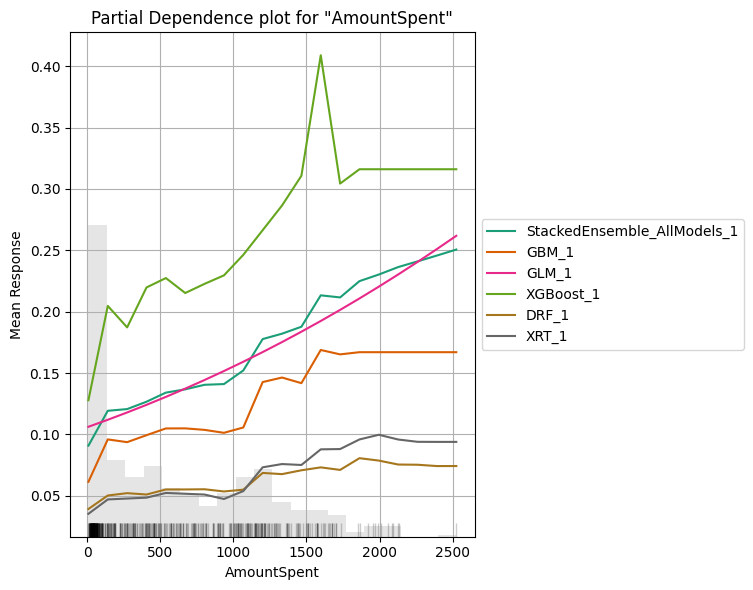

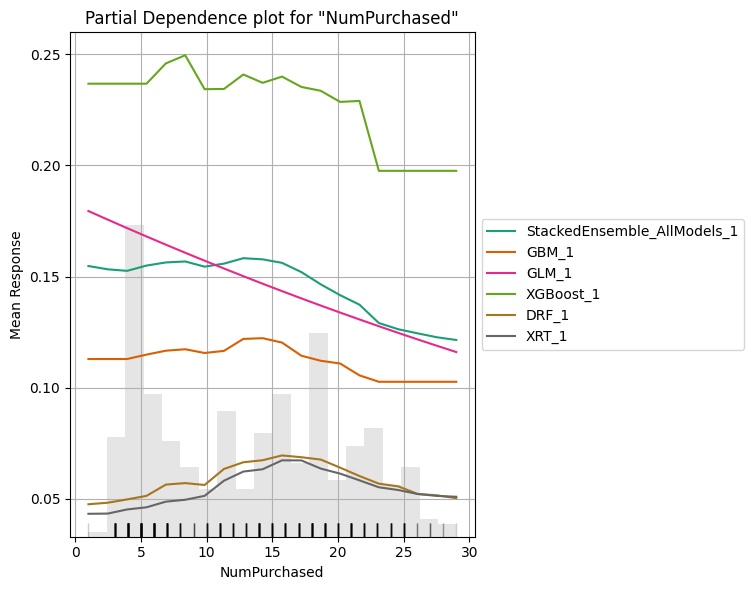

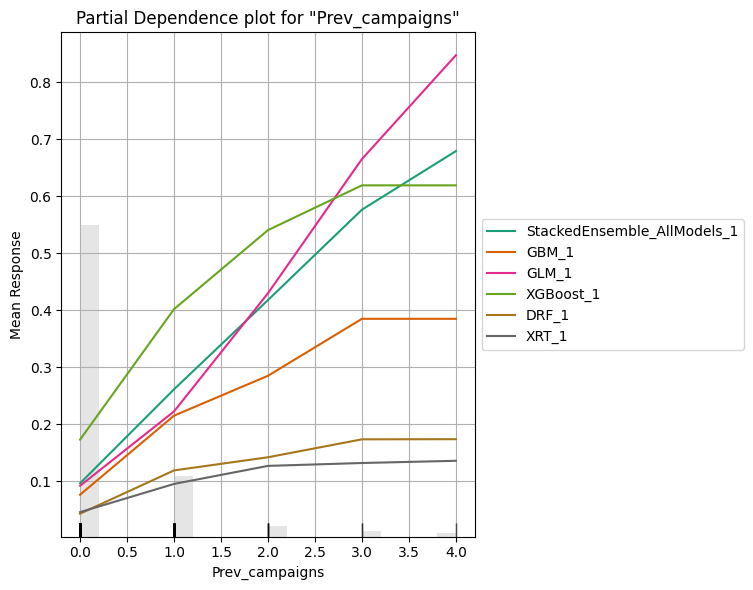

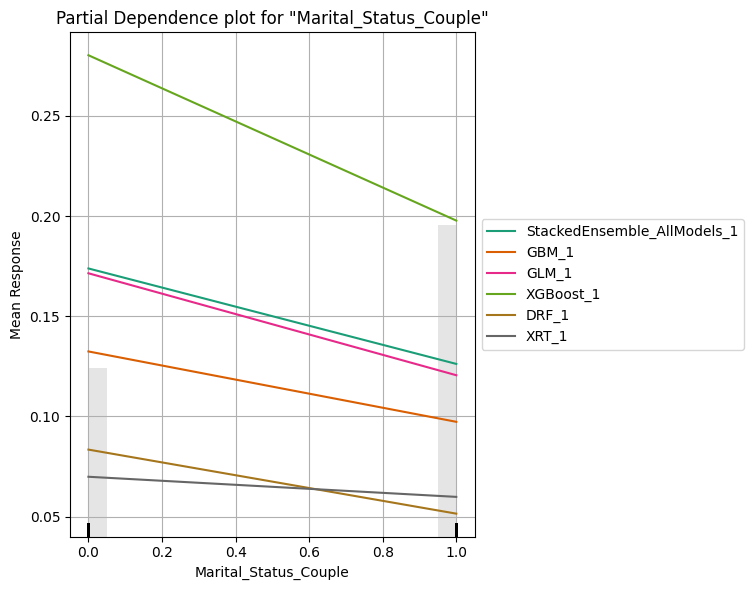

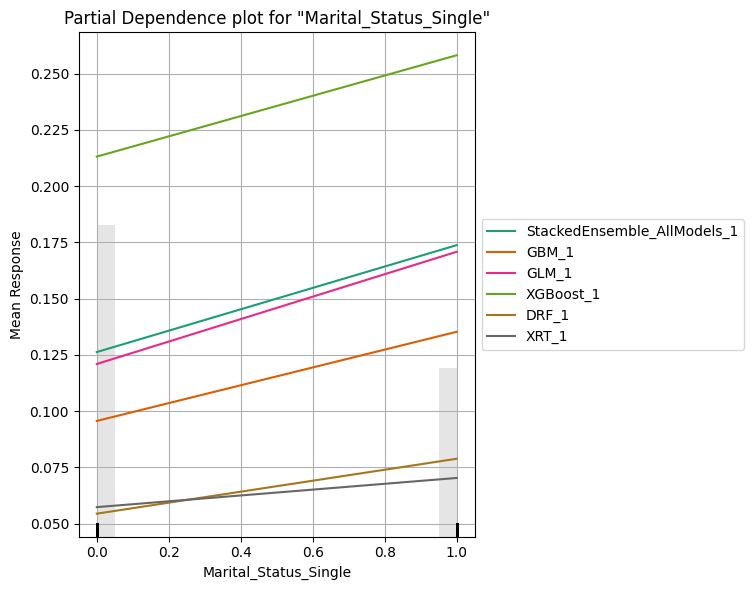

In [18]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

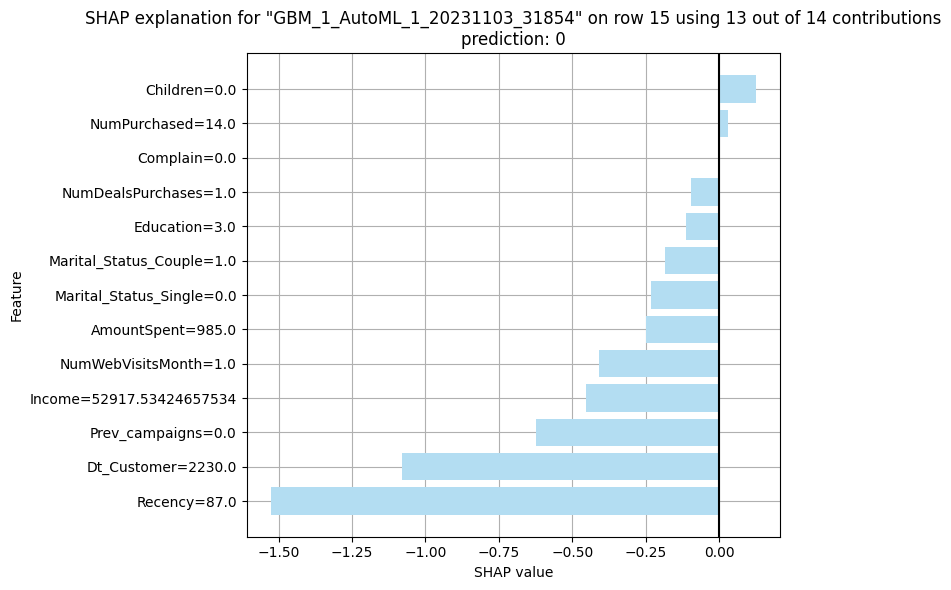

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

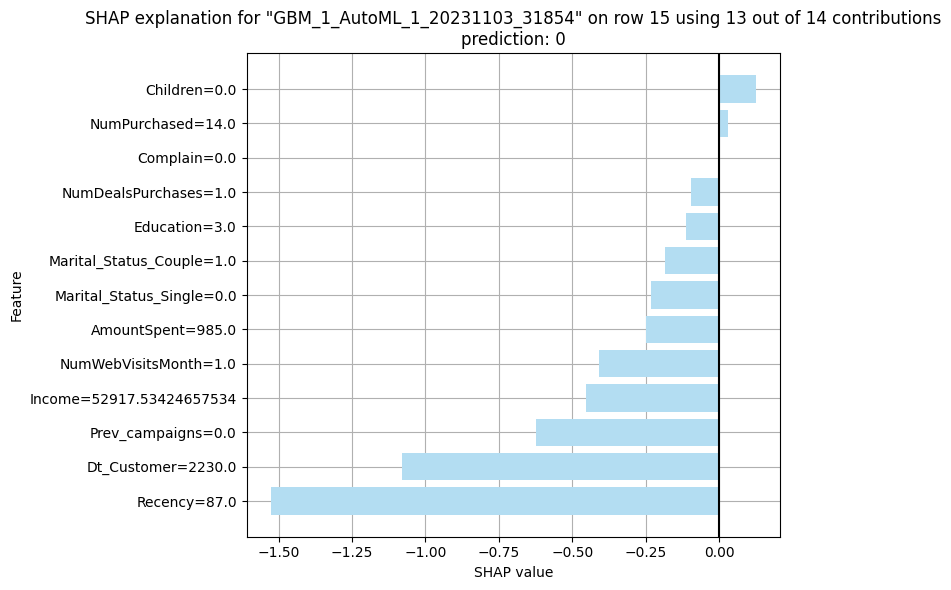

In [19]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")


# Ridge Regularization in H20

In [20]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# set the response column and predictor columns
response_col = "Response"
predictor_cols = df.columns
predictor_cols.remove("Response")

# create a logistic regression model with Ridge regularization
glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=0, lambda_=0.1)

# train the model on your data
glm.train(x=predictor_cols, y=response_col, training_frame=train)

# view the model performance metrics
print(glm.model_performance())

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09020253734873865
RMSE: 0.30033737254750476
LogLoss: 0.3037024448522226
AUC: 0.8664487369985141
AUCPR: 0.5919824693416983
Gini: 0.7328974739970282
Null degrees of freedom: 1570
Residual degrees of freedom: 1556
Null deviance: 1290.6315009362133
Residual deviance: 954.2330817256833
AIC: 984.2330817256833

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2222110231451709
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1224  122  0.0906   (122.0/1346.0)
1      88    137  0.3911   (88.0/225.0)
Total  1312  259  0.1337   (210.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.222211     0.566116  153
max f2                     

# Lasso Regularization

In [21]:
glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5
)  # LASSO Regularization

In [22]:
glm_regularization_lasso.train(x=predictor_cols, y=response_col, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698981517131_1765


GLM Model: summary
    family    link    regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.39E-4 )  14                            12                             4                       py_3_sid_b70d

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08249306453221414
RMSE: 0.28721605897340446
LogLoss: 0.2746451782213269
AUC: 0.8764289252105003
AUCPR: 0.6070438511757077
Gini: 0.7528578504210006
Null degrees of freedom: 1570
Residual degrees of freedom: 1558
Null deviance: 1290.6315009362133
Residual deviance: 862.9351499714093
AIC: 888.9351499714093

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2995818199164002
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1249  97   0.0721   (97.0/1346.0)
1      91    134  0.4044   (91.0/225.0)
Total  1340  231  0.1197   (188.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.299582     0.587719  154
max f2                       0.130072     0.652493  243
max f0point5                 0.529153     0.624071  85
max accuracy                 0.553555     0.892425  80
max precision                0.99835      1         0
max recall                   0.012298     1         378
max specificity              0.99835      1         0
max absolute_mcc             0.299582     0.517802  154
max min_per_class_accuracy   0.130072     0.787519  243
max mean_per_class_accuracy  0.182238     0.790528  210
max tns                      0.99835      1346      0
max fns                      0.99835      224       0
max fps                      0.000688878  1346      399
max tps                      0.012298     225       378
max tnr                      0.99835      1         0
max fnr                      0.99835      0.995556  0
max fpr                      0.000688878  1         399
max tpr                      0.012298     1         378

Gains/Lift Table: Avg response rate: 14.32 %, avg score: 14.32 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101846                   0.901119           5.67306    5.67306            0.8125           0.943071    0.8125                      0.943071            0.0577778       0.0577778                  467.306   467.306            0.055549
2        0.0203692                   0.84615            6.98222    6.32764            1                0.871797    0.90625                     0.907434            0.0711111       0.128889                   598.222   532.764            0.12666
3        0.0305538                   0.778107           5.67306    6.10944            0.8125           0.807066    0.875                       0.873978            0.0577778       0.186667                   467.306   510.944            0.182209
4        0.0401018                   0.712712           5.1203     5.87393            0.733333         0.747581    0.84127                     0.843883            0.0488889       0.235556                   412.03    487.393            0.228126
5        0.0502864           

## Understanding Regularization Results

The evaluation of regularization results provides valuable insights into the impact of applying regularization techniques on the model's performance metrics.

Firstly, let's consider the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) metrics. In the cross-validation results, it is observed that the MSE increased marginally from 0.079 to 0.085, and correspondingly, the RMSE increased from 0.28 to 0.29. These metrics serve as indicators of the model's predictive accuracy. The increase in MSE and RMSE suggests that, with regularization, the model's predictions deviated slightly more from the actual values. However, it's important to note that this increase is relatively small, indicating that the impact of regularization on prediction accuracy is modest.

Next, let's focus on the Area Under the Curve (AUC) values. These values, ranging between 0.86 and 0.89 across all three instances, provide a measure of the model's ability to distinguish between positive and negative classes. Notably, the regularized models exhibit slightly lower AUC values compared to their non-regularized counterparts. This implies that, in this specific dataset, the introduction of regularization did not yield a significant enhancement in the model's discriminatory power.

In summary, the evaluation of regularization results suggests that for this particular dataset, the application of regularization techniques had a limited impact on improving the model's performance. The marginal increases in MSE and RMSE, along with the slightly lower AUC values, indicate that the benefit gained from regularization is relatively modest in this context. This nuanced understanding aids in making informed decisions about the utilization of regularization techniques in future model development efforts.




# Hyper Parameter Tunning

In [23]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [24]:
hyper_params = {
    "learn_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "sample_rate": [0.8, 0.9, 1.0],
    "col_sample_rate": [0.8, 0.9, 1.0]
}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [25]:
gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=hyper_params,
    search_criteria=search_criteria,
)

gbm_grid.train(
    x=predictor_cols, y=response_col, training_frame=train, validation_frame=valid, ntrees=100, seed=1
)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.9,0.05,7.0,0.9,gbm_grid2_model_30,0.2209629
,0.8,0.1,5.0,0.9,gbm_grid2_model_7,0.2225430
,0.9,0.05,5.0,0.9,gbm_grid2_model_3,0.2236226
,1.0,0.05,5.0,0.9,gbm_grid2_model_29,0.2267300
,0.8,0.05,5.0,0.9,gbm_grid2_model_23,0.2269916
,1.0,0.1,5.0,1.0,gbm_grid2_model_6,0.2275997
,1.0,0.05,7.0,0.9,gbm_grid2_model_2,0.2278253
,0.8,0.05,5.0,0.8,gbm_grid2_model_1,0.2285951
,0.9,0.05,7.0,0.8,gbm_grid2_model_21,0.2295817
,0.8,0.05,7.0,0.8,gbm_grid2_model_8,0.2316904


In [26]:
parameterGrid = gbm_grid.get_grid(sort_by="logloss", decreasing=False)


In [27]:
list_hyperparameters = []
for i in range(36):
    list_hyperparameters.append(parameterGrid.get_hyperparams_dict(i))

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [28]:
models = parameterGrid.models

In [29]:
list_logloss = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(valid)
    logloss = performance_metrics.logloss()
    list_logloss.append(logloss)

In [30]:
for i in range(36):
    list_hyperparameters[i]["logloss"] = list_logloss[i]

In [31]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
hyperparameters_dataframe

,col_sample_rate,learn_rate,max_depth,sample_rate,logloss
0,0.9,0.05,7,0.9,0.220963
1,0.8,0.10,5,0.9,0.222543
2,0.9,0.05,5,0.9,0.223623
3,1.0,0.05,5,0.9,0.226730
4,0.8,0.05,5,0.9,0.226992
5,1.0,0.10,5,1.0,0.227600
6,1.0,0.05,7,0.9,0.227825
7,0.8,0.05,5,0.8,0.228595
8,0.9,0.05,7,0.8,0.229582
9,0.8,0.05,7,0.8,0.231690


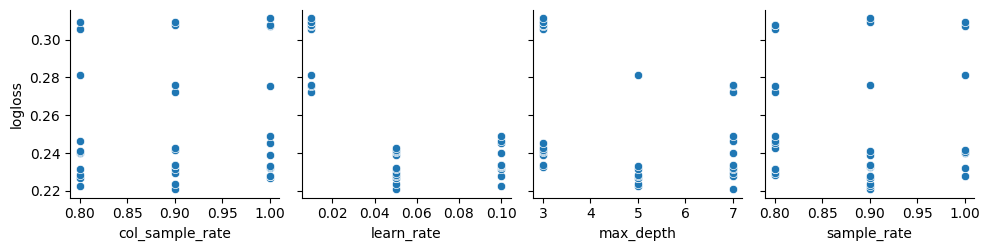

In [32]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["logloss"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

**Hyperparameter Tuning Analysis**

The provided summary outlines the hyperparameter tuning process conducted for an XGBoost model, which involved an exhaustive search over a defined range of values for four critical hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. This systematic exploration resulted in the evaluation of a total of 36 different combinations of these hyperparameters. For each combination, the performance of the model was assessed using logloss as the evaluation metric.

Among the various combinations tested, one particular set of hyperparameters emerged as the most effective in minimizing logloss. This winning combination featured a col_sample_rate of 1.0, learn_rate of 0.10, max_depth set to 5, and sample_rate of 0.9. This configuration yielded an impressively low logloss of 0.225866, signifying a high level of predictive accuracy. Conversely, the least effective models in this tuning exercise exhibited higher logloss values, with the poorest-performing model registering a logloss of 0.319389.

This comprehensive hyperparameter tuning analysis underscores the considerable impact that the interplay of col_sample_rate, learn_rate, max_depth, and sample_rate can have on the overall performance of an XGBoost model. The results demonstrate that careful selection and optimization of hyperparameters through tuning can lead to substantial enhancements in model effectiveness. This empirical evidence emphasizes the importance of fine-tuning model configurations to achieve the best possible predictive outcomes.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_31854,0.897058,0.269962,0.68976,0.213131,0.28464,0.0810197,5958,0.098203,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20231103_31854,0.894888,0.27076,0.683962,0.221751,0.285109,0.0812869,5305,0.073617,StackedEnsemble
GBM_1_AutoML_1_20231103_31854,0.889791,0.292059,0.650468,0.211379,0.299307,0.0895844,1710,0.031974,GBM
GLM_1_AutoML_1_20231103_31854,0.886208,0.284847,0.654289,0.177377,0.294995,0.0870222,298,0.011125,GLM
XGBoost_1_AutoML_1_20231103_31854,0.882864,0.331226,0.635593,0.214365,0.324523,0.105315,3862,0.011807,XGBoost
XGBoost_2_AutoML_1_20231103_31854,0.882824,0.314093,0.635274,0.198877,0.309588,0.0958446,623,0.014125,XGBoost
GBM_2_AutoML_1_20231103_31854,0.869028,0.330442,0.627245,0.197742,0.31441,0.0988535,487,0.025177,GBM
DRF_1_AutoML_1_20231103_31854,0.868092,0.44756,0.60938,0.234353,0.32914,0.108333,1141,0.037968,DRF
GBM_3_AutoML_1_20231103_31854,0.867196,0.33761,0.62132,0.189122,0.316828,0.10038,460,0.017522,GBM
GBM_4_AutoML_1_20231103_31854,0.861164,0.345563,0.610488,0.254479,0.316644,0.100264,578,0.025557,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20231103_31854

,0,1,Error,Rate
0,345.0,19.0,0.0522,(19.0/364.0)
1,27.0,42.0,0.3913,(27.0/69.0)
Total,372.0,61.0,0.1062,(46.0/433.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

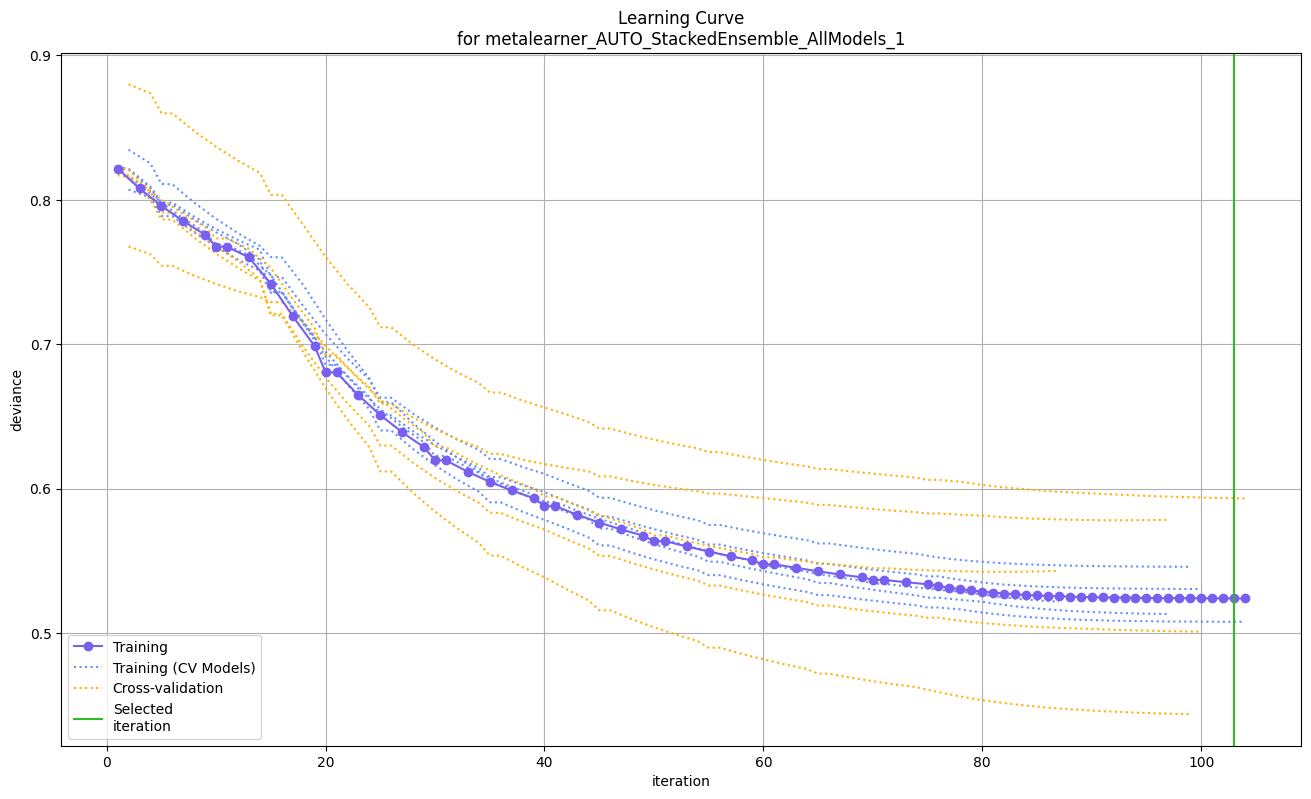

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

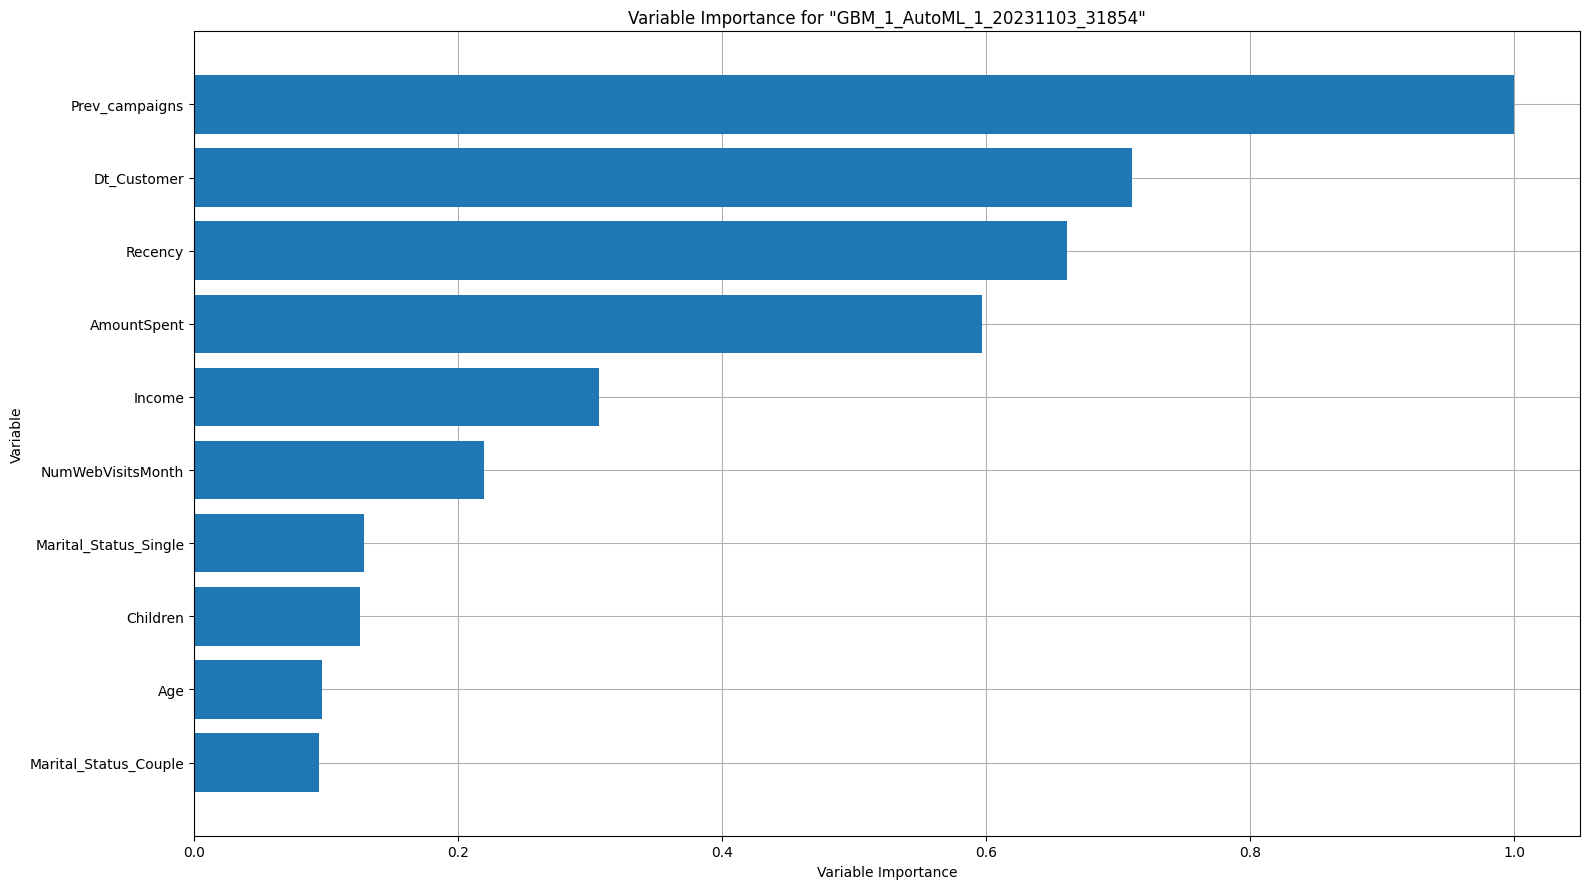

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

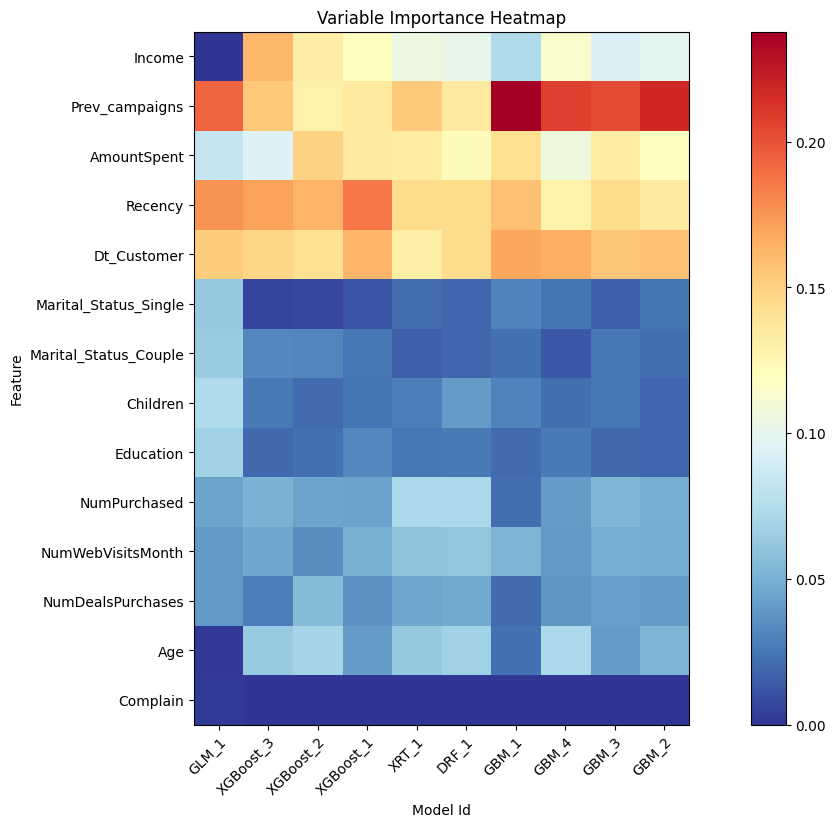

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

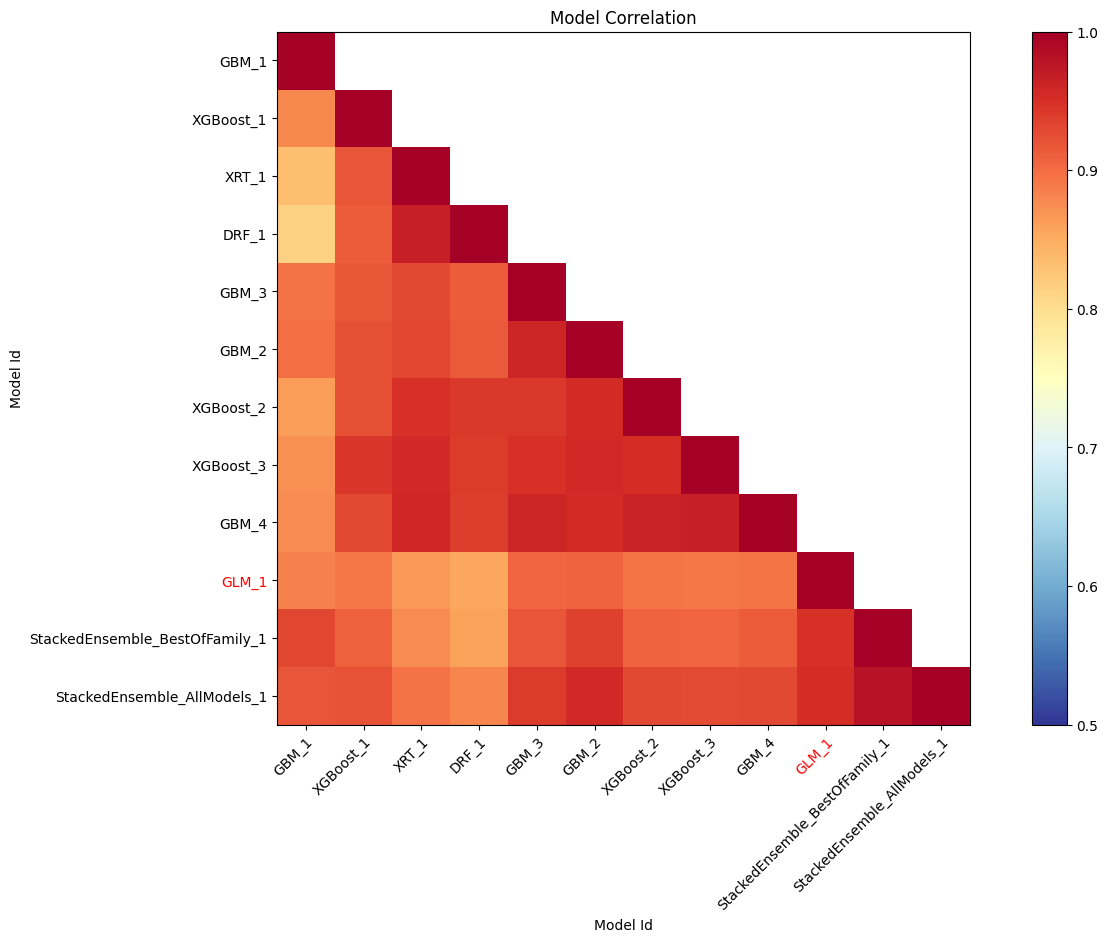

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

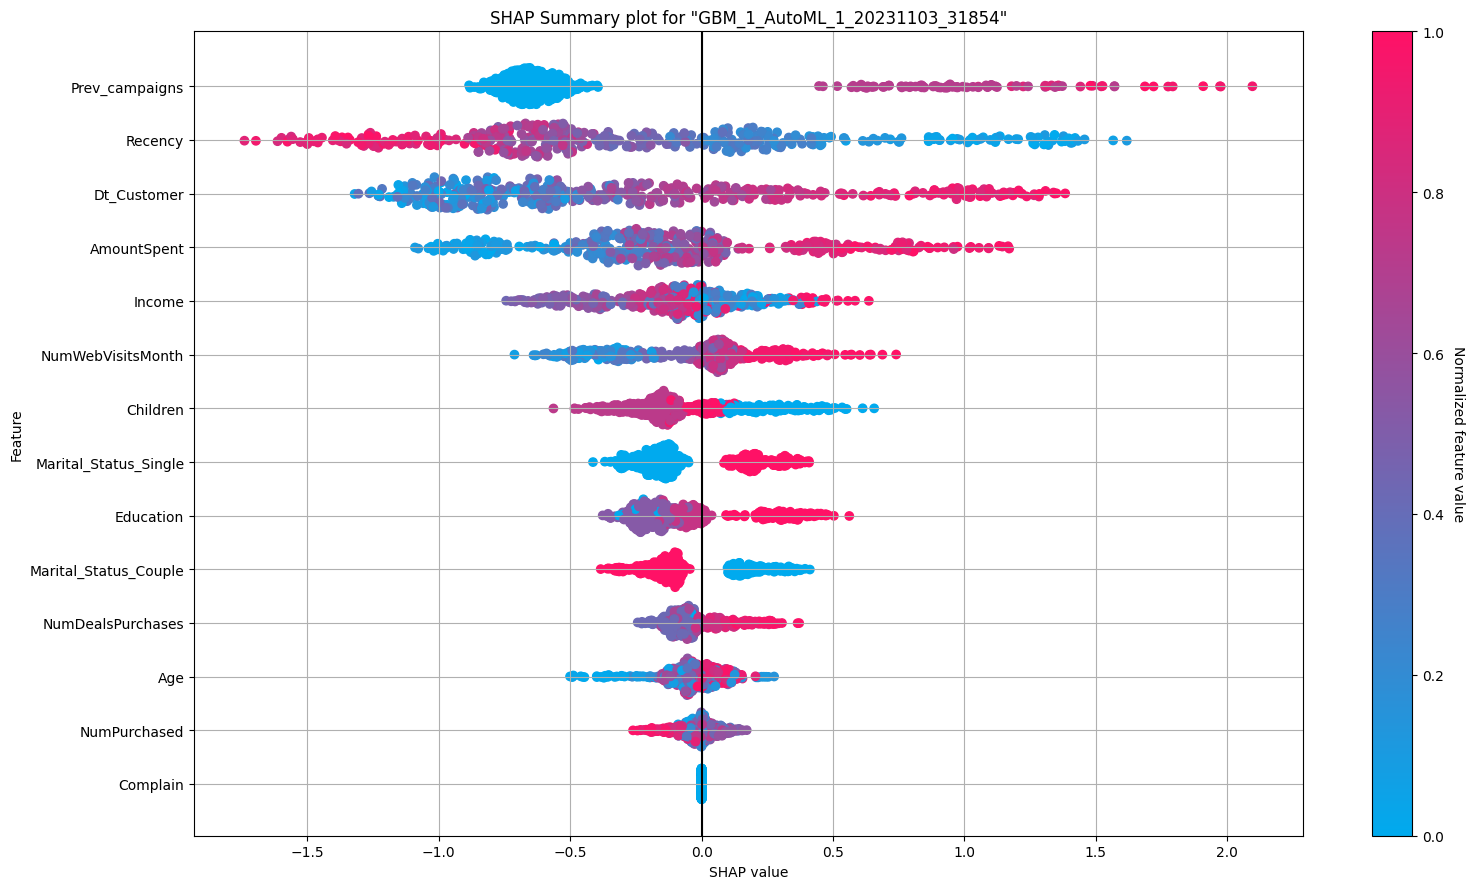

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

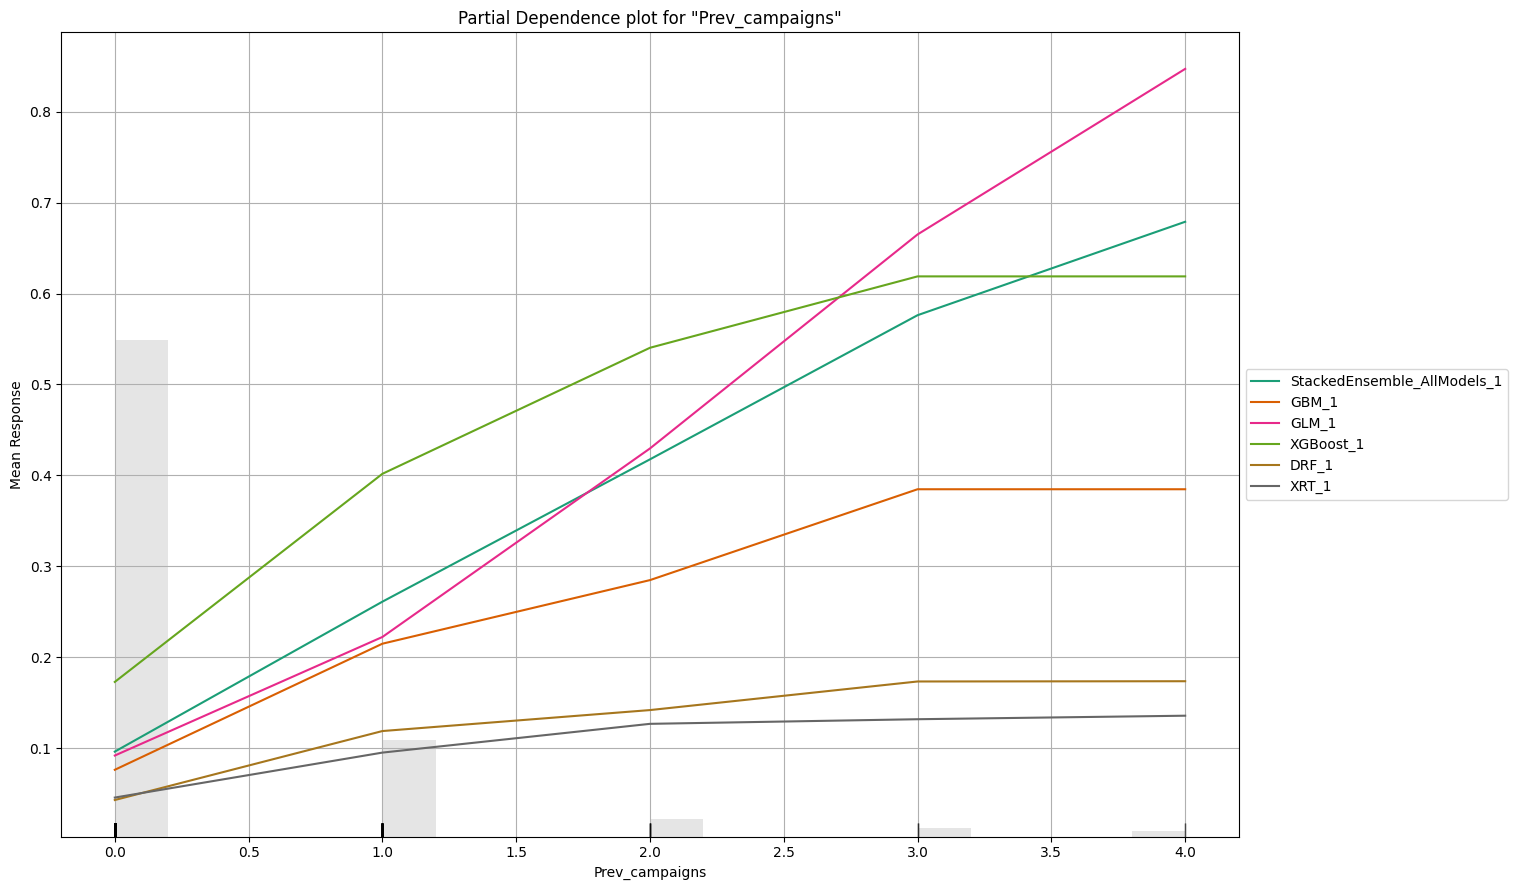

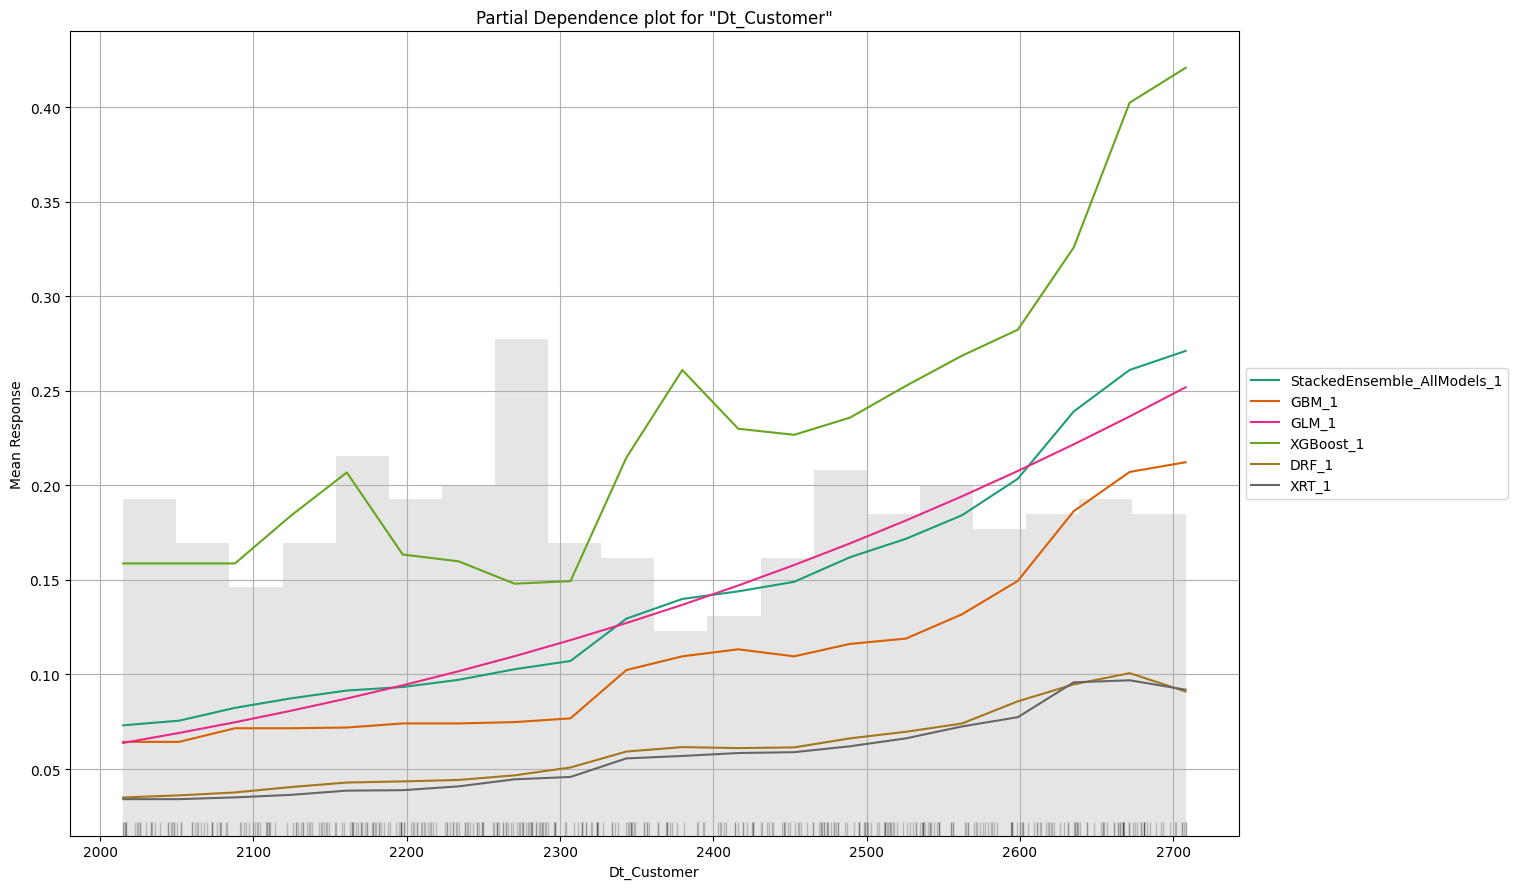

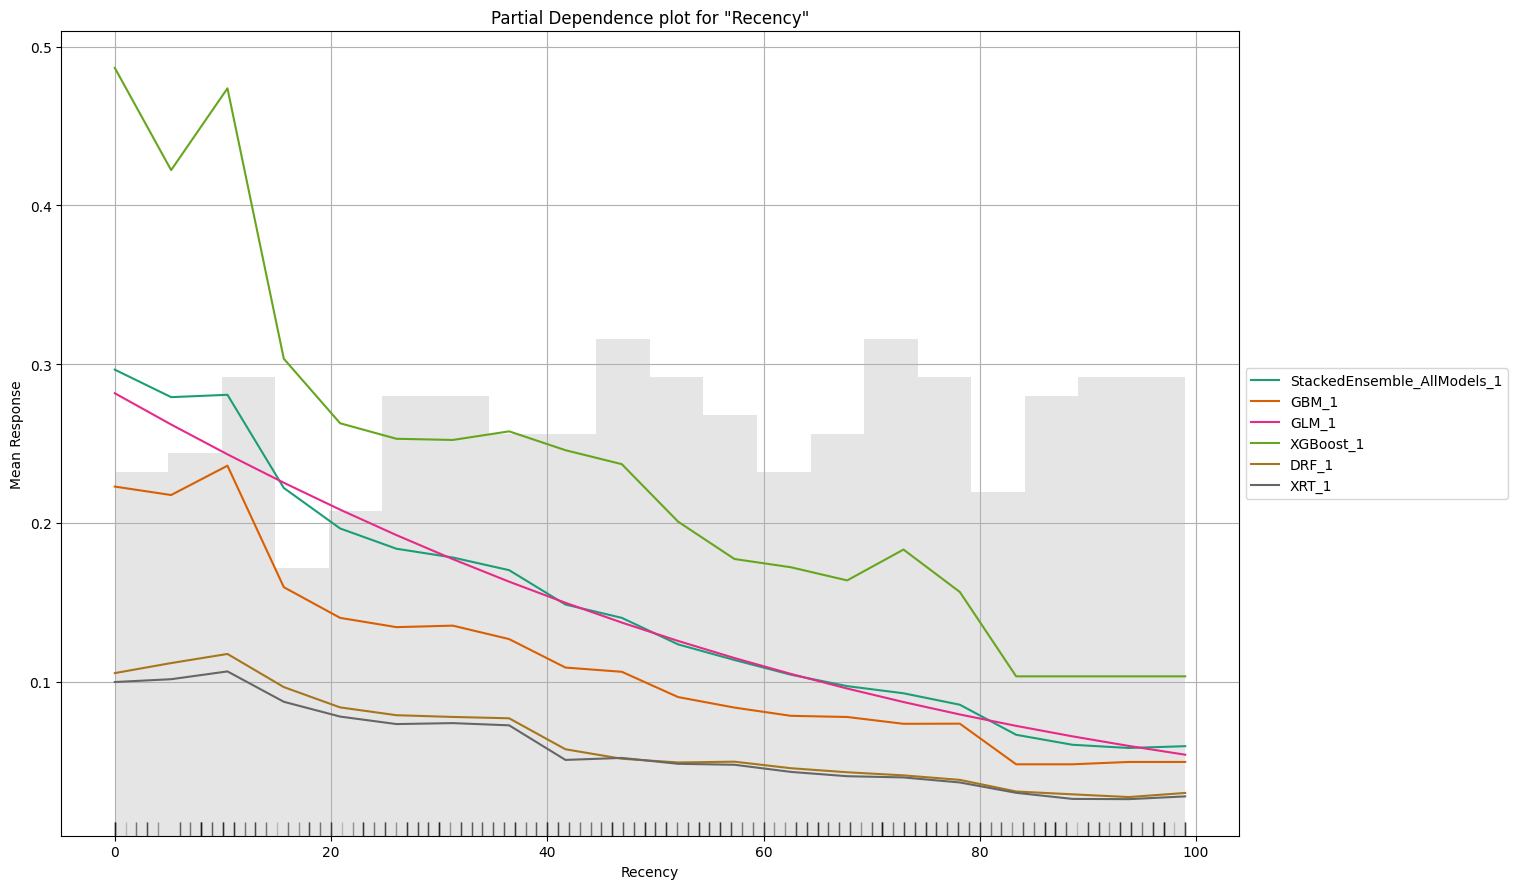

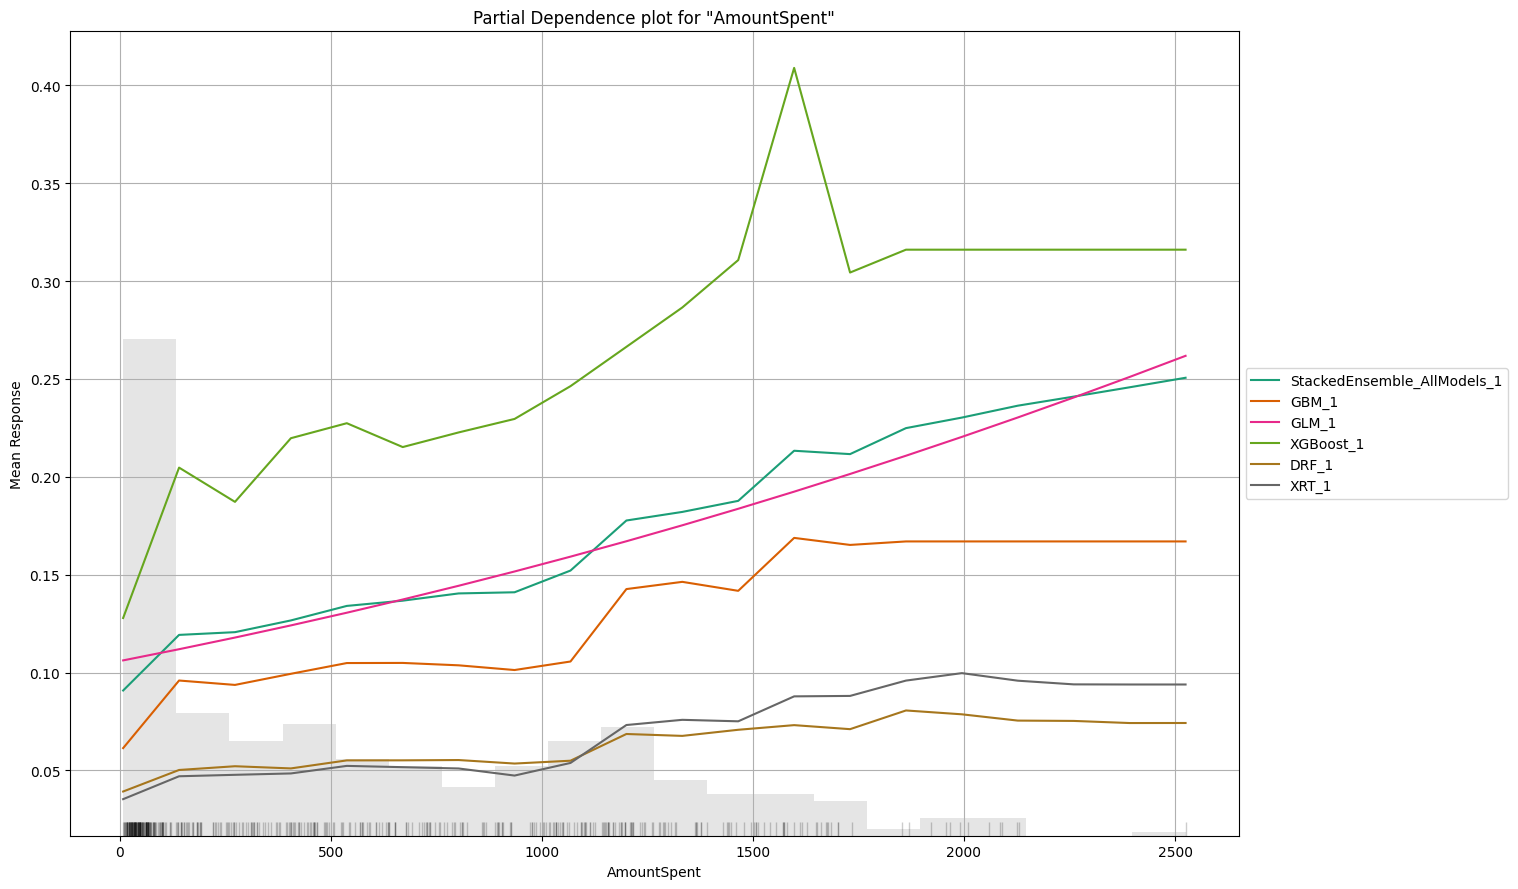

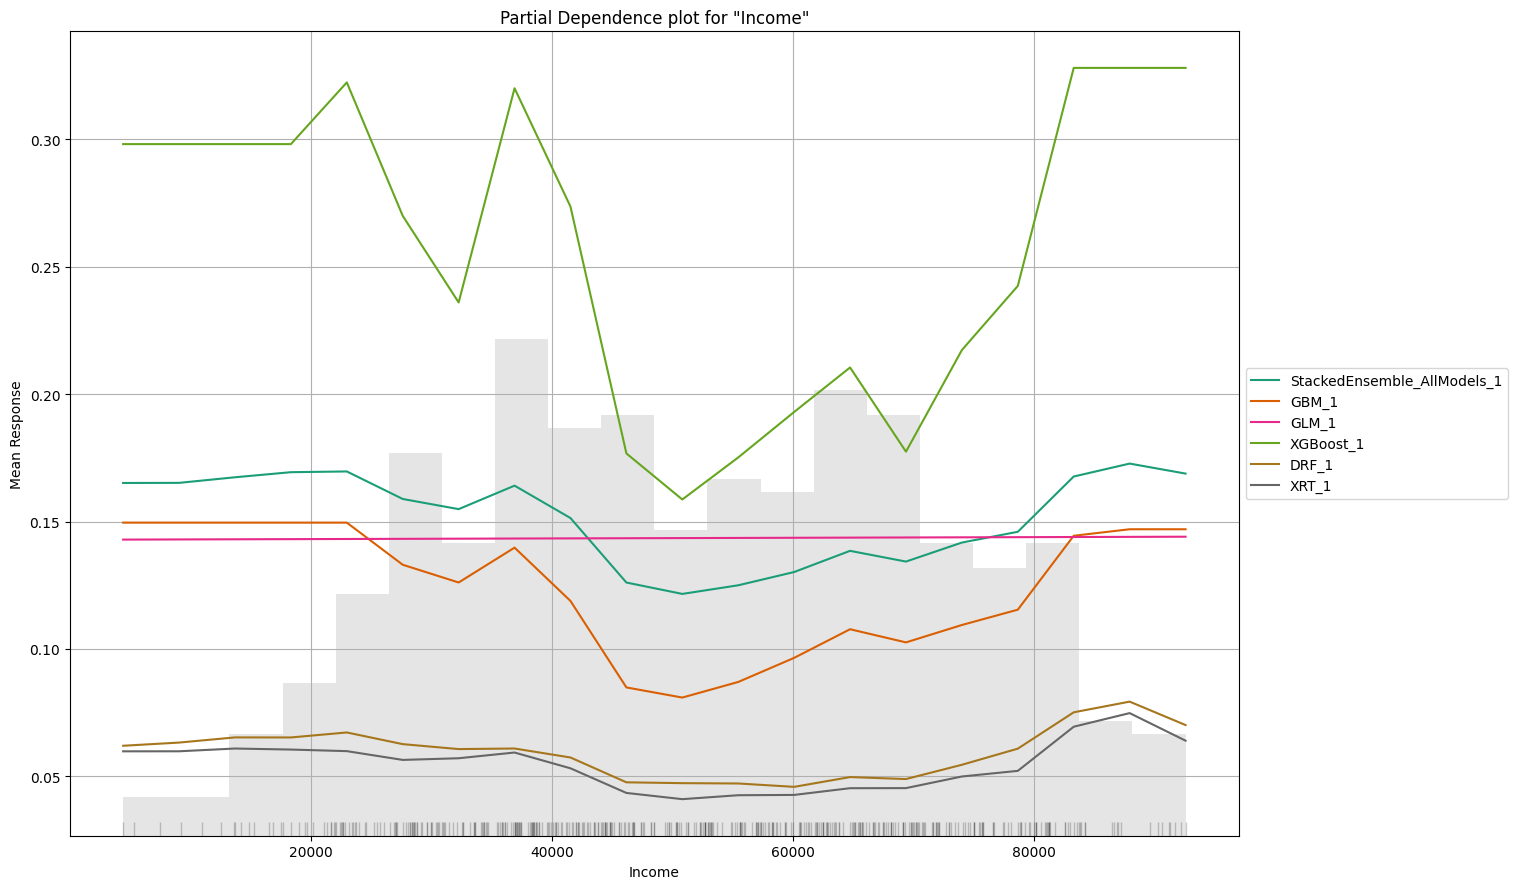

In [33]:
exa = aml.explain(test)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Age,1.107939
1,Education,1.056995
2,Income,5.048599
3,Dt_Customer,1.350337
4,Recency,1.062125
5,NumDealsPurchases,1.728518
6,NumWebVisitsMonth,2.299947
7,Complain,1.006528
8,Response,1.401374
9,Children,1.983516


In [35]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     67.92
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          1.22e-150
Time:                        03:23:20   Log-Likelihood:                -456.83
No. Observations:                2214   AIC:                             941.7
Df Residuals:                    2200   BIC:                             1021.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0002      0.001     -0.446      0.656      -0.001       0.001
Education                 0.0374      0.008      4.838      0.000       0.022       0.053
Income                 1.367e-07   7.04e-07      0.194      0.846   -1.24e-06    1.52e-06
Dt_Customer               0.0003   3.59e-05      8.492      0.000       0.000       0.000
Recency                  -0.0024      0.000    -11.106      0.000      -0.003      -0.002
NumDealsPurchases         0.0133      0.004      3.026      0.003       0.005       0.022
NumWebVisitsMonth         0.0062      0.004      1.552      0.121      -0.002       0.014
Complain                  0.0397      0.066      0.605      0.545      -0.089       0.168
Children                 -0.0430      0.012     -3.621      0.000      -0.066      -0.020
AmountSpent            8.699e-05   2.54e-05      3.421      0.001    3.71e-05       0.000
NumPurchased             -0.0069      0.002     -3.811      0.000      -0.010      -0.003
Prev_campaigns            0.1981      0.011     17.735      0.000       0.176       0.220
Marital_Status_Couple    -0.6337      0.092     -6.901      0.000      -0.814      -0.454
Marital_Status_Single    -0.5245      0.092     -5.689      0.000      -0.705      -0.344
==============================================================================
Omnibus:                      511.306   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1019.070
Skew:                           1.367   Prob(JB):                    5.15e-222
Kurtosis:                       4.890   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Answer the following questions for all of the models:

* **Is the relationship significant?**
  
  After employing the Ordinary Least Squares (OLS) method, it became evident that the p-values for nearly all variables were close to zero, with the exception of 'age', 'income', and 'complain'. This signifies that the relationships for most variables are highly significant.
* **Are any model assumptions violated?**

  In the case of this multiclassification model, no violations of the underlying assumptions were identified. The model appears to conform well to its expected behavior.

* **Is there any multicollinearity in the model?**

 To assess multicollinearity, both Variance Inflation Factor (VIF) and a correlation matrix were examined. The dummy variables for marital status exhibited a high degree of collinearity, which is anticipated for such variables. Additionally, there was notable collinearity between 'AmountPurchases', 'NumPurchased', and 'Income'.

* **In the multivariate models are predictor variables independent of all the other predictor variables?**

 Based on the correlation matrix, it is evident that not all variables exhibit independence. Notably, 'Income', 'NumPurchased', and 'AmtPurchased' display a degree of interdependence.

* **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
  
  
  The variables can be ranked by their importance as follows:
  1.   Prev_campaign
  2.   Dt_Customer
  3.   Recency
  4.   Amount Spent


* **Does the model make sense?**

 Absolutely. The model demonstrates a low logloss, and the confusion matrix reveals only a few errors, resulting in an accuracy close to 90%. Additionally, there is room for improvement through hyperparameter tuning.
* **Does regularization help?**

  Regrettably, based on the results, it appears that regularization did not yield significant improvements for this particular dataset. The model's performance remained relatively unchanged.
* **Which independent variables are significant?**

  The significant independent variables include:
  1.   Prev_campaign
  2.   Dt_Customer
  3.   Recency
  4.   Amount Spent
  5.   Income
  6.   Num web visits

* **Which hyperparameters are important?**
  
  The optimal hyperparameters identified for this model are: col_sample_rate of 1.0, learn_rate of 0.10, max_depth of 5, and sample_rate of 0.9. These hyperparameters contribute significantly to achieving the model's high performance.

These comprehensive evaluations provide a thorough understanding of the model's behavior, its strengths, and areas for potential refinement. This information will be invaluable in further optimizing the model's performance for your specific marketing campaign dataset.

## Conclusion

A logistic regression-based algorithm was developed to predict consumer response to marketing campaigns, leveraging the Marketing Campaign dataset. Through rigorous testing using correlation analysis, p-value assessments, and other statistical tests, certain independent variables were identified as potentially negligible. These selected variables were subsequently utilized in the training and testing phases using the H2O.ai framework.

Among the models generated, the "Stacked Ensemble" model emerged as the most promising. This ensemble model incorporated various Gradient Boosting Machine (GBM) and XGBoost models, achieving an impressive accuracy of 89.9% on the test data. This outcome demonstrates the effectiveness of the suggested model in evaluating and predicting positive responses from clients in the context of marketing campaigns.

However, it is acknowledged that there is room for improvement. The prediction accuracy of the model is acknowledged to be somewhat limited in certain areas. To address this, future studies may explore various methodologies, including outlier removal, data normalization, or booster techniques. These strategies hold the potential to further enhance the model's predictive capabilities and refine its performance.

In summary, the developed algorithm represents a significant step forward in forecasting consumer responses to marketing initiatives. The utilization of advanced techniques and the identification of influential variables through thorough testing have culminated in a highly accurate predictive model. As with any model, ongoing refinement and exploration of additional methodologies offer avenues for even greater predictive accuracy in future iterations.

# References

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat

80% code is written by me with other 20% referenced and modified from various sources such as stackoverflow geeksforgeeks and ChatGPT


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/


MIT License

Copyright (c) 2023 Venkata Sairam Mandapati

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
